In [12]:
%matplotlib inline

import numpy
import gym
import random

In [13]:
env = gym.make('CartPole-v0')

In [14]:
class Q:
    def __init__(self, a_space=2):
        self.map = {}
        self.a_space = a_space
        
    def __setitem__(self, key, value):
        q, a = key
        q_h = hash(tuple(q))
        self.map[q_h][a] = value

    def __getitem__(self, item):
  
        # Query for only State
        if len(item) != 2:
            q_h = hash(tuple(item))
            
            if q_h in self.map:
                return self.map[q_h]

            self.map[q_h] = [0 for _ in range(self.a_space)]
            return self.map[q_h]
              
        elif len(item) == 2:
            q, a = item
            q_h = hash(tuple(q))
            
            # Return q_h, a
            if q_h in self.map:
                return self.map[q_h][a]
            
            self.map[q_h] = [0 for _ in range(self.a_space)]
            return self.map[q_h][a]
        else:
            raise Exception("You cannot have 3 arguments!")
        
        
        


In [15]:
q = Q()

In [16]:
# learning rate
lr = 0.2

# discount factor
discount = 0.99

# epsilon ceiling
epsilon_max = 1.0

# epsilon floor
epsilon_min = 0

# number of fixed epsilon decay steps
epsilon_steps = 1000000

# epsilon decay ratio
epsilon_decay = (epsilon_max - epsilon_min) / epsilon_steps

# initialize epsilon to ceiling
epsilon = epsilon_max

In [17]:
# plotting stuff
plot_wins = []
plot_loss = []
plot_avg_reward = []
plot_max_reward = []
plot_y = []


s_l: 13, avg: 120.0, epsilon: 0.9999879999999997, epoch: 0 max_reward 12.0 w/l: 0-1


s_l: 2072, avg: 22.979404119176163, epsilon: 0.9885079999996695, epoch: 500 max_reward 104.0 w/l: 0-501


s_l: 3036, avg: 23.158684131586842, epsilon: 0.976838999999334, epoch: 1000 max_reward 104.0 w/l: 0-1001


s_l: 3710, avg: 23.21378574761683, epsilon: 0.9651769999989986, epoch: 1500 max_reward 104.0 w/l: 0-1501


s_l: 4222, avg: 23.116844157792112, epsilon: 0.9537639999986705, epoch: 2000 max_reward 104.0 w/l: 0-2001


s_l: 4763, avg: 23.31066757329707, epsilon: 0.9417209999983241, epoch: 2500 max_reward 104.0 w/l: 0-2501


s_l: 5167, avg: 23.49455018166061, epsilon: 0.9295139999979731, epoch: 3000 max_reward 104.0 w/l: 0-3001


s_l: 5535, avg: 23.599897145795836, epsilon: 0.9173979999976247, epoch: 3500 max_reward 104.0 w/l: 0-3501


s_l: 5882, avg: 23.74740631484213, epsilon: 0.9050079999972684, epoch: 4000 max_reward 116.0 w/l: 0-4001


s_l: 6263, avg: 23.918801804404346, epsilon: 0.8923629999969048, epoch: 4500 max_reward 116.0 w/l: 0-4501


s_l: 6535, avg: 24.107717845643084, epsilon: 0.8794589999965338, epoch: 5000 max_reward 116.0 w/l: 0-5001


s_l: 6916, avg: 24.33792112870675, epsilon: 0.8661389999961507, epoch: 5500 max_reward 116.0 w/l: 0-5501


s_l: 7225, avg: 24.652589123514606, epsilon: 0.8520819999957465, epoch: 6000 max_reward 116.0 w/l: 0-6001


s_l: 7484, avg: 24.811772126582667, epsilon: 0.8387209999953623, epoch: 6500 max_reward 116.0 w/l: 0-6501


s_l: 7782, avg: 25.07664176226054, epsilon: 0.8244609999949523, epoch: 7000 max_reward 123.0 w/l: 0-7001


s_l: 8081, avg: 25.286862841828775, epsilon: 0.8103459999945464, epoch: 7500 max_reward 123.0 w/l: 0-7501


s_l: 8373, avg: 25.512556093048836, epsilon: 0.7958969999941309, epoch: 8000 max_reward 123.0 w/l: 0-8001


s_l: 8661, avg: 25.807108151668803, epsilon: 0.7806369999936921, epoch: 8500 max_reward 123.0 w/l: 0-8501


s_l: 8941, avg: 26.08804346618371, epsilon: 0.7652049999932483, epoch: 9000 max_reward 123.0 w/l: 0-9001


s_l: 9143, avg: 26.337722760813044, epsilon: 0.749788999992805, epoch: 9500 max_reward 123.0 w/l: 0-9501


s_l: 9417, avg: 26.641933580664194, epsilon: 0.7335779999923389, epoch: 10000 max_reward 123.0 w/l: 0-10001


s_l: 9729, avg: 26.966790792468643, epsilon: 0.7168459999918577, epoch: 10500 max_reward 123.0 w/l: 0-10501


s_l: 9974, avg: 27.366660303088153, epsilon: 0.6989639999913435, epoch: 11000 max_reward 123.0 w/l: 0-11001


s_l: 10243, avg: 27.799584351440423, epsilon: 0.6803019999908069, epoch: 11500 max_reward 143.0 w/l: 0-11501


s_l: 10699, avg: 28.358680344330462, epsilon: 0.6596929999902142, epoch: 12000 max_reward 143.0 w/l: 0-12001


s_l: 11045, avg: 28.865769073847407, epsilon: 0.6391749999896242, epoch: 12500 max_reward 143.0 w/l: 0-12501


s_l: 11431, avg: 29.37754324966731, epsilon: 0.6180889999890179, epoch: 13000 max_reward 143.0 w/l: 0-13001


s_l: 11819, avg: 30.002740720439107, epsilon: 0.5949599999883528, epoch: 13500 max_reward 145.0 w/l: 0-13501


s_l: 12154, avg: 30.597781444418253, epsilon: 0.5716279999876819, epoch: 14000 max_reward 161.0 w/l: 0-14001


s_l: 12601, avg: 31.22695705546858, epsilon: 0.5472059999869796, epoch: 14500 max_reward 165.0 w/l: 0-14501


s_l: 13085, avg: 32.00625329164472, epsilon: 0.5199029999861945, epoch: 15000 max_reward 200.0 w/l: 2-14999


s_l: 13508, avg: 32.75727253372559, epsilon: 0.49225899998582934, epoch: 15500 max_reward 200.0 w/l: 3-15498


s_l: 14042, avg: 33.65741464115849, epsilon: 0.4614779999866529, epoch: 16000 max_reward 200.0 w/l: 7-15994


s_l: 14490, avg: 34.545548208798735, epsilon: 0.42999499998749524, epoch: 16500 max_reward 200.0 w/l: 13-16488


s_l: 14963, avg: 35.62096693548862, epsilon: 0.39443999998844653, epoch: 17000 max_reward 200.0 w/l: 16-16984


s_l: 15389, avg: 36.756875674996145, epsilon: 0.3567509999894549, epoch: 17500 max_reward 200.0 w/l: 29-17471


s_l: 15876, avg: 38.154565807967735, epsilon: 0.3132139999906198, epoch: 18000 max_reward 200.0 w/l: 51-17949


s_l: 16467, avg: 39.75070405024838, epsilon: 0.26460799999192025, epoch: 18500 max_reward 200.0 w/l: 84-18415


s_l: 16889, avg: 41.326571965410714, epsilon: 0.21479099999227586, epoch: 19000 max_reward 200.0 w/l: 119-18879


s_l: 17445, avg: 43.04829206004072, epsilon: 0.1605539999922216, epoch: 19500 max_reward 200.0 w/l: 161-19337


KeyboardInterrupt: 

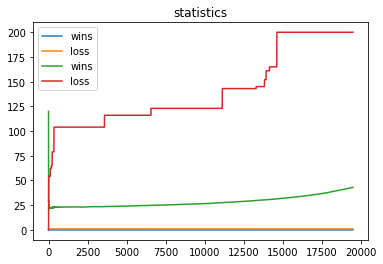

In [18]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


# epoch counter
current_epoch = 0
max_epoch = 100000

# reward counter
max_reward = 0
global_reward = 0

# diagnostics
print_every = 500
win_threshold = 190
wins = 0
loss = 0

while current_epoch < max_epoch:
    # reset episodic reward
    episodic_reward = 0

    # reset terminal state to false
    terminal = False
    
    # reset environment and observe state s (only use 1 decimal)
    s = numpy.around(env.reset(), decimals=1)
    
    while not terminal:
        # Predict optimal policy (Action)  # TODO ? is it called policy?
        
        # use epsilon greedy strategy to determine random policy or optimal policy
        if random.random() < epsilon:
            # random policy
            a = env.action_space.sample()
        else:
            # "optimal" policy
            a = numpy.argmax(q[s])
   
        # decay epsilon, use max() so it does not go below epsilon_min
        epsilon = max(epsilon_min, epsilon - epsilon_decay)
        
        # perform action a on environment
        # retrieve following:
        # s_ - next state (s+1)
        # r - reward doing action a
        # t - terminal state
        s_, r, t, _ = env.step(a)
        s_ = numpy.around(s_, decimals=1)  # remove some decimals
        
        # perform update using value iteration (q-learning)
        q[s, a] = q[s, a] + lr*(r + discount * numpy.max(q[s_]) - q[s, a])
        
        # s+1 is now s
        s = s_
        terminal = t


    ############################################
    ###########################################
    # not part of algorithm below
        
        # sum up episodic reward
        episodic_reward += r
        
        if t:
            if episodic_reward > win_threshold:
                wins += 1
            elif episodic_reward < win_threshold:
                loss += 1      
                




    global_reward += episodic_reward

    plot_wins.append(wins / (wins + loss))
    plot_loss.append(loss / (wins + loss))
    plot_avg_reward.append(global_reward / (current_epoch+.1))
    plot_max_reward.append(max_reward)
    plot_y.append(current_epoch)

    if episodic_reward > max_reward:
        max_reward = episodic_reward

    if current_epoch % print_every == 0:
        plt.clf()
        plt.cla()
        plt.plot(plot_y, plot_wins, label="wins")
        plt.plot(plot_y, plot_loss, label="loss")
        plt.plot(plot_y, plot_avg_reward, label="wins")
        plt.plot(plot_y, plot_max_reward, label="loss")
        plt.title("statistics")
        plt.legend()

        
        print("s_l: %s, avg: %s, epsilon: %s, epoch: %s max_reward %s w/l: %s-%s" % (
            len(q.map), global_reward / (current_epoch+.1), epsilon, current_epoch, max_reward, wins, loss
        ))
        
        clear_output()
        
    current_epoch += 1
    
    
    
    
    
    
    
